In [10]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_csv('../data/case-similarity/case-similarity-responses-llama2-70b-chat.csv')
results_df

,prompt,response,actual,pred,doc1,doc2
0,[INST]Given below are four pairs of legal docu...,Yes.\n\nThe given parts of Legal Document 9 an...,1,1,1548289,529229
1,[INST]Given below are four pairs of legal docu...,Yes.\n\nThe given parts of Legal Document 9 an...,1,1,1734007,1194654
2,[INST]Given below are four pairs of legal docu...,No.\n\nThe given parts of Legal Document 9 and...,0,0,5398766,19267666
3,[INST]Given below are four pairs of legal docu...,Yes.\n\nThe given parts of Legal Document 9 an...,1,1,858492,1299452
4,[INST]Given below are four pairs of legal docu...,No.\n\nThe given parts of Legal Document 9 and...,0,0,514077,673012
...,...,...,...,...,...,...
2621,[INST]Given below are four pairs of legal docu...,No.\n\nThe given parts of Legal Document 9 and...,0,0,1882267,633111
2622,[INST]Given below are four pairs of legal docu...,Yes.\n\nThe given parts of Legal Document 9 an...,0,1,893844,1136885
2623,[INST]Given below are four pairs of legal docu...,No.\n\nThe given parts of Legal Document 9 and...,1,0,103057287,111777378
2624,[INST]Given below are four pairs of legal docu...,No.\n\nThe given parts of Legal Document 9 and...,0,0,261992,1802196


In [11]:
from nltk.tokenize import word_tokenize

def count_tokens(text):
    tokens = word_tokenize(text)
    return len(tokens)

In [12]:
results_df['token_count'] = results_df['response'].apply(count_tokens)
results_df['token_count'].describe()

count    2626.000000
mean       37.617669
std         3.358012
min         3.000000
25%        37.000000
50%        38.000000
75%        39.000000
max        45.000000
Name: token_count, dtype: float64

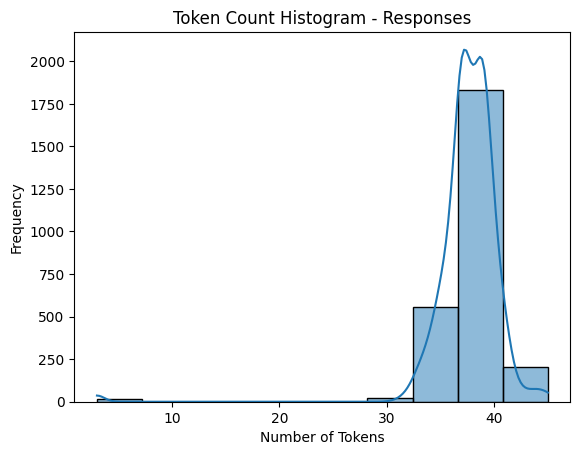

In [13]:
import seaborn as sns

sns.histplot(results_df['token_count'], bins=10, kde=True)
plt.title('Token Count Histogram - Responses')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.savefig('../results/responses-tc.png')

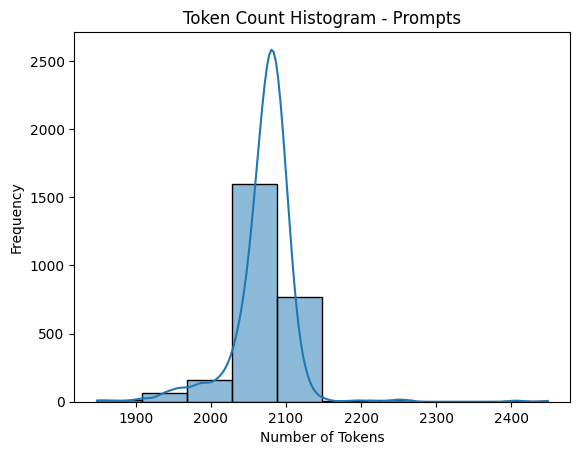

In [14]:
results_df['token_count_prompt'] = results_df['prompt'].apply(count_tokens)

sns.histplot(results_df['token_count_prompt'], bins=10, kde=True)
plt.title('Token Count Histogram - Prompts')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.savefig('../results/prompts-tc.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


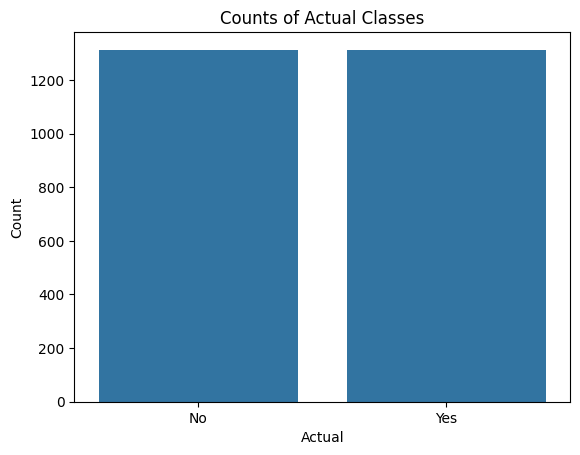

In [15]:
ax = sns.countplot(data=results_df, x='actual')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Counts of Actual Classes')
plt.xlabel('Actual')
plt.ylabel('Count')
ax.legend().set_visible(False)
plt.savefig('../results/actual-cls.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


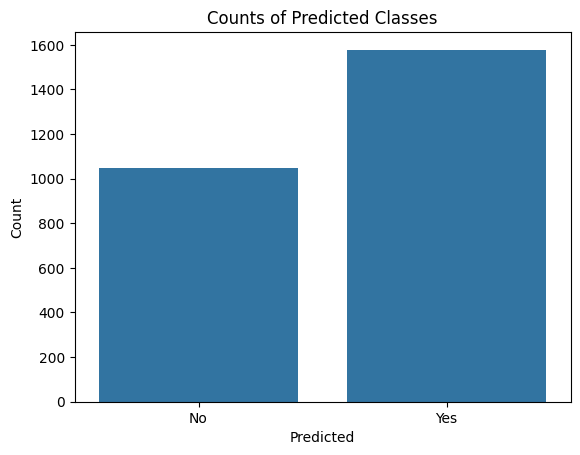

In [16]:
ax = sns.countplot(data=results_df, x='pred')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Counts of Predicted Classes')
plt.xlabel('Predicted')
plt.ylabel('Count')
ax.legend().set_visible(False)
plt.savefig('../results/pred-cls.png')

In [17]:
print(results_df['prompt'][0])

[INST]Given below are four pairs of legal documents. You have been presented with some parts of these documents and whether they are similar or not. Try to answer for Document 9 and Document 10.

### Document 1: provided to the Copyright Board against the order of the Registrar under
Sec.72 of the Copyright Act. We mention the character of the order under Sec.
53 to indicate that the effect of an order under of the Copyright Act is not
as portentous as a notification under Sec. 11 of the Customs Act. The
Registrar is nor bound to make an order under Sec. 53 of the Copyright Act so
soon as an application is presented to him by the owner of the Copyright. He
has naturally to consider the context of the mischief sought to be prevented.
He must consider whether the copies would infringe the Copyright if the copies
were made in India. He must consider whether the applicant owns the Copyright
or is the duly authorised agent of the Copyright. He must hear these claiming
to be affected if an o

In [18]:
results_df['token_count'].describe()

count    2626.000000
mean       37.617669
std         3.358012
min         3.000000
25%        37.000000
50%        38.000000
75%        39.000000
max        45.000000
Name: token_count, dtype: float64